<a href="https://colab.research.google.com/github/khaledhassann/QR-Code-Reader/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode
# from google.colab.patches import cv2_imshow

## Solved cases in preprocessing
* Case 1
* Case 3 (rotated but manually)
* Case 4 (rotated but manually)
* Case 5
* Case 6
* Case 8
* Case 9
* Case 11
* Case 12
* Case 13
* Case 14 (still needs a little shift)
* Case 15 (solved but need to see what the decoder says)
* Case 16

## Yet to solve
* Case 2 (fit to square)
* Case 7 (shelna el soba3)
* Case 10 (ma2toosha men fo2 shemal mabetet2erish)

### Adham
* Case 2 (fit to square)

### Khaled
* Case 7 (kamel ba3d el soba3)
* Case 10 (try to regenerate or read the qr)

## Plotting qr codes and their grayscale histograms

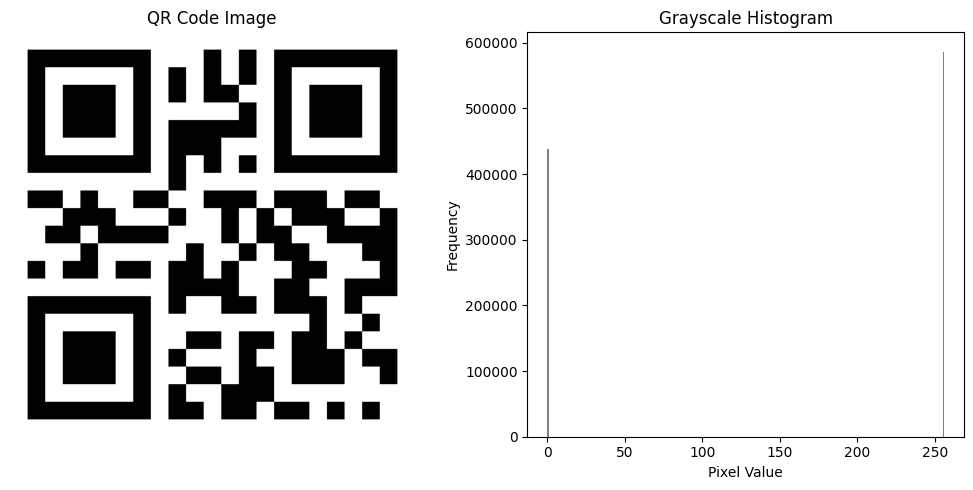

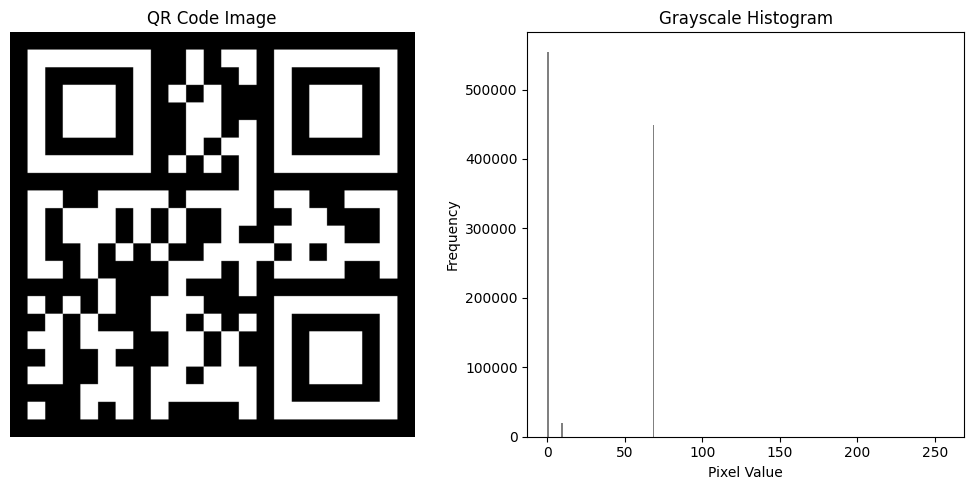

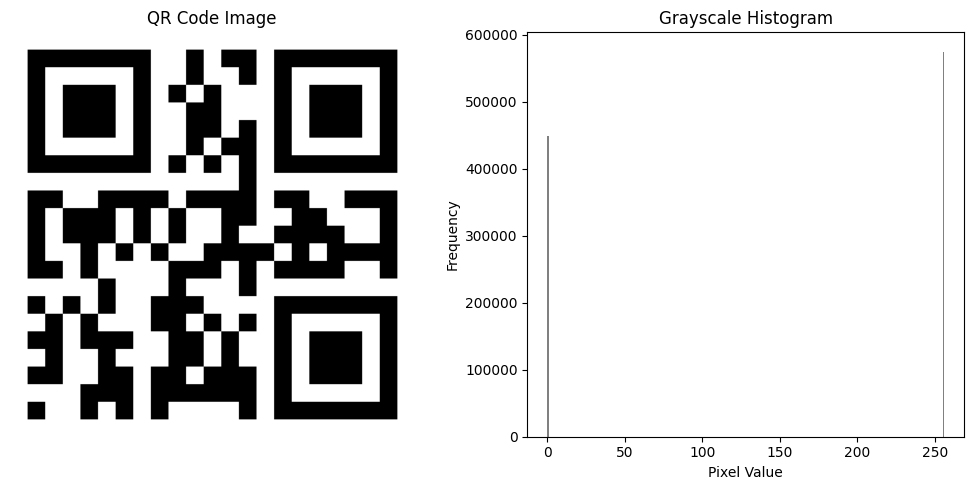

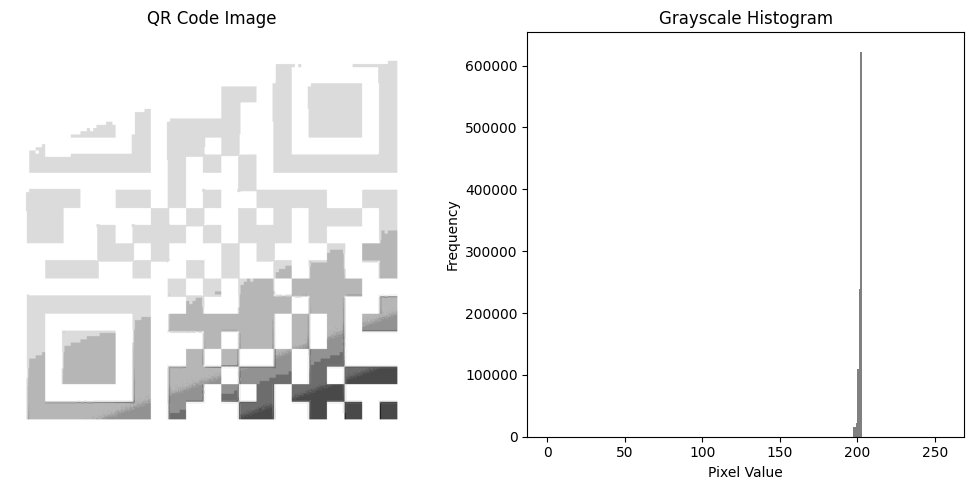

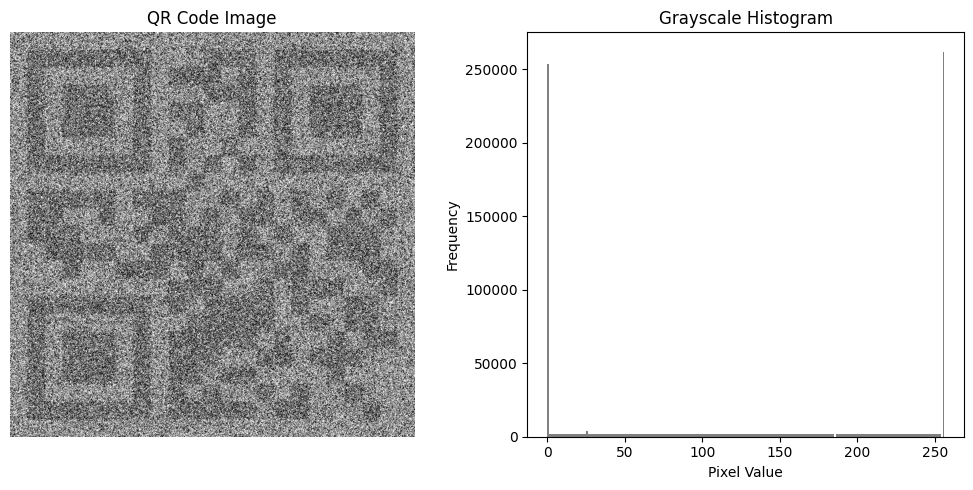

In [20]:
import cv2
import matplotlib.pyplot as plt

# Function to read an image and plot its histogram
def plot_image_and_histogram(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Plot the image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('QR Code Image')
    plt.axis('off')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Grayscale Histogram')

    # Show the plot
    plt.tight_layout()
    plt.show()

# # List of QR code image paths
# qr_images = [
#     'images/01-Getting-started.png', 'images/02-Matsawar-3edel-ya3am.png','images/03-Leffy-bina-ya-donya.png', 'images/04-Black-mirror.png','images/05-Caesar-cipher.png','images/06-Railfence-cipher.png', 'images/07-THE-MIGHTY-FINGER.png', 'images/08-Compresso-Espresso.png','images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', 'images/10-Gone-With-The-Wind.png', 'images/11-weewooweewooweewoo.png', 'images/12-mal7-w-felfel.png', 'images/13-2el-noor-2ata3.png', 'images/14-BANANAAA!!!.png', 'images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg', 'images/16-V3-QR-Code...-can-you-do-it.png'
#              ]

khaled_qr_images = ['images/01-Getting-started.png','images/04-Black-mirror.png', 'images/10-Gone-With-The-Wind.png', 'images/12-mal7-w-felfel.png']

# Plot each QR code and its histogram
for qr_image in khaled_qr_images:
    if(qr_image == 'images/04-Black-mirror.png'):
        plot_image_and_histogram(qr_image)
        invert_and_threshold(qr_image, 'images/04-Inverted-Black-mirror.png')
        plot_image_and_histogram('images/04-Inverted-Black-mirror.png')
    else:
        plot_image_and_histogram(qr_image)


## Removing different noises

### Removing salt and pepper noise

In [1]:
# def remove_salt_and_pepper_noise(image_path, output_path):
#     # Read the image
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Define the custom 1x4 filter
#     kernel = np.ones((1, 4), dtype=np.uint8)  # Custom 1x4 rectangular kernel

#     # Apply binary thresholding to make pixels either 0 or 255
#     _, thresholded_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

#     # Apply custom median filtering
#     filtered_image = cv2.medianBlur(thresholded_img, ksize=1)  # Apply median filter with ksize=1 (kernel size not used)

#     # Manually apply the custom filter using OpenCV's filter2D function
#     filtered_image = cv2.filter2D(thresholded_img, -1, kernel)

#     # Averaging filter
#     kernel_size = (3, 3)  # Example: 3x3 kernel
#     averaged_image = cv2.blur(filtered_image, ksize=kernel_size)

#     # Thresholding tani
#     _, thresholded_img = cv2.threshold(averaged_image, 220, 255, cv2.THRESH_BINARY)

#     # # Save the filtered image
#     # cv2.imwrite('filtered_image_custom_1x4.png', filtered_image)


    

#     # # Define the filter size as 1x4
#     # filter_size = (1, 4)

#     # # Apply median filtering to remove salt and pepper noise
#     # filtered_img = cv2.medianBlur(thresholded_img, ksize= filter_size)

#     # Save the filtered image
#     cv2.imwrite(output_path, thresholded_img)

#     return thresholded_img


In [109]:
import numpy as np
from numba import njit,prange


@njit
def padding(img,pad):
    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

@njit(parallel=True)
def AdaptiveMedianFilter(img,s=3,sMax=7):

    
    if len(img.shape) == 3:
        raise Exception ("Single channel image only")

    H,W = img.shape
    a = sMax//2
    padded_img = padding(img,a)

    f_img = np.zeros(padded_img.shape)

    for i in prange(a,H+a+1):
        for j in range(a,W+a+1):
            value = Lvl_A(padded_img,i,j,s,sMax)
            f_img[i,j] = value

    return f_img[a:-a,a:-a] 

@njit
def Lvl_A(mat,x,y,s,sMax):
    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    A1 = Zmed - Zmin
    A2 = Zmed - Zmax

    if A1 > 0 and A2 < 0:
        return Lvl_B(window, Zmin, Zmed, Zmax)
    else:
        s += 2 
        if s <= sMax:
            return Lvl_A(mat,x,y,s,sMax)
        else:
             return Zmed

@njit
def Lvl_B(window, Zmin, Zmed, Zmax):
    h,w = window.shape

    Zxy = window[h//2,w//2]
    B1 = Zxy - Zmin
    B2 = Zxy - Zmax

    if B1 > 0 and B2 < 0 :
        return Zxy
    else:
        return Zmed

In [94]:
def adaptive_medfilt(x, ws=3, ws_max=7, axis=(0,1), mode='constant'):
    if isinstance(axis, int): axis = (axis,)
    if isinstance(ws, int): ws = len(axis) * (ws,)
    
    y = np.zeros_like(x)
    x_pad = np.pad(x, [2*[ws[axis.index(ax)]//2 if ax in axis else 0] for ax in range(x.ndim)], mode)
    x_stride = np.lib.stride_tricks.sliding_window_view(x_pad, ws, axis)
    x_min = np.min(x_stride, tuple(x_stride.ndim-1-np.arange(len(axis))))
    x_med = np.median(x_stride, tuple(x_stride.ndim-1-np.arange(len(axis))))
    x_max = np.max(x_stride, tuple(x_stride.ndim-1-np.arange(len(axis))))
    
    mask1 = (x_med - x_min > 0) * (x_med - x_max < 0)
    mask2 = (x - x_min > 0) * (x - x_max < 0)
    y[mask1 * mask2] = x[mask1 * mask2]
    y[mask1 * ~mask2] = x_med[mask1 * ~mask2]
    y[~mask1] = adaptive_medfilt(x, [ws[ax]+2 for ax in range(len(axis))], ws_max, axis, mode)[~mask1] if all([ws[ax]<=ws_max for ax in range(len(axis))]) else x_med[~mask1]

    return y

### Reconstructing missing parts

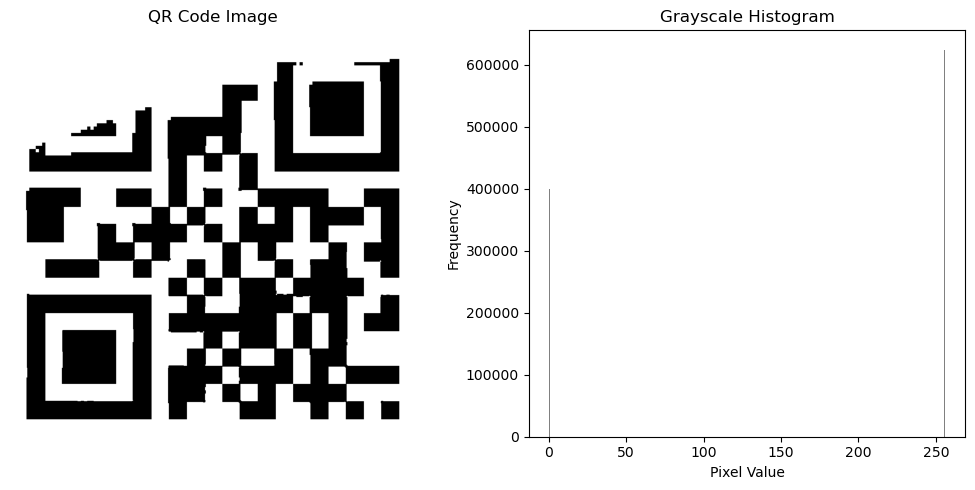

No QR code found or unable to decode.


In [22]:
from pyzbar.pyzbar import decode
from PIL import Image
import qrcode

# Load the damaged QR code image
damaged_qr_image = cv2.imread('images/10-solved.png', cv2.IMREAD_GRAYSCALE)

plot_image_and_histogram('images/10-solved.png')

# Decode the damaged QR code to extract the data and error correction codewords
decoded_data = decode(damaged_qr_image)

if decoded_data:
    data = decoded_data[0].data.decode("utf-8")  # Extract the data from the decoded QR code
    error_correction = decoded_data[0].error_correction  # Extract the error correction level

    # Use the data and error correction level to reconstruct the QR code
    qr = qrcode.QRCode(
        version=None,
        error_correction=error_correction,
        box_size=10,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    # Generate the restored QR code image
    restored_qr_image = qr.make_image(fill_color="black", back_color="white")

    # Save or display the restored QR code image
    restored_qr_image.save("restored_qr_code.png")
else:
    print("No QR code found or unable to decode.")


In [29]:
missing_qr_image_path = 'images/10-solved.png'
min_perimeter = 4000
max_perimeter = 4080

missing_qr_image = cv2.imread(missing_qr_image_path, cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(missing_qr_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def fill_missing_modules(region):
    """
    Fill missing or damaged modules within a specified region of a QR code image using averaging.
    
    Parameters:
    - region: NumPy array representing the region of the QR code image to restore
    
    Returns:
    - restored_region: NumPy array representing the restored region with filled missing modules
    """
    # Create a copy of the region to work with
    restored_region = region.copy()

    # Define the kernel size for averaging (adjust as needed)
    kernel_size = (3, 3)

    # Iterate over the region and fill in missing modules using averaging
    for y in range(1, region.shape[0] - 1):
        for x in range(1, region.shape[1] - 1):
            if region[y, x] == 0:  # Check if the module is missing (0 = black)
                # Average the values of surrounding modules using a kernel
                avg_value = np.mean(region[y-1:y+2, x-1:x+2])
                restored_region[y, x] = avg_value

    return restored_region


# Filter contours based on size and shape to identify finder patterns
finder_pattern_contours = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    if perimeter > min_perimeter and perimeter < max_perimeter:  # Adjust min and max perimeter thresholds
        finder_pattern_contours.append(contour)

# Iterate over finder pattern contours and restore damaged modules
restored_qr_code = missing_qr_image.copy()  # Create a copy of the original image for restoration
for contour in finder_pattern_contours:
    # Determine the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Restore damaged modules within the bounding box
    restored_qr_code[y:y+h, x:x+w] = fill_missing_modules(restored_qr_code[y:y+h, x:x+w])


# Save or display the restored QR code image
cv2.imwrite('restored_qr_code.png', restored_qr_code)

perimeter



4044.0

### Detecting and fixing misalignment

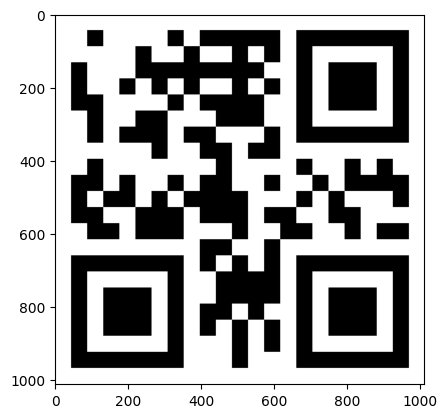

In [20]:
test_img = cv2.imread('images/03-Leffy-bina-ya-donya.png')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
plt.imshow(test_img, cmap='gray')

In [35]:
import cv2
import numpy as np

def detect_finder_patterns(qr_code_image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(qr_code_image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Detect contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours to find potential finder pattern candidates
    finder_patterns = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        if perimeter > 4000 and perimeter < 5000:  # Adjust min and max perimeter thresholds
            finder_patterns.append(contour)

    return finder_patterns

def calculate_alignment_offset(finder_patterns):
    # Calculate the centroid of each finder pattern
    centroids = []
    for contour in finder_patterns:
        moments = cv2.moments(contour)
        centroid_x = int(moments['m10'] / moments['m00'])
        centroid_y = int(moments['m01'] / moments['m00'])
        centroids.append((centroid_x, centroid_y))

    # Sort the centroids based on their x and y coordinates
    centroids.sort(key=lambda x: (x[0], x[1]))

    # Calculate the alignment offset based on the centroids
    offset_x = centroids[1][0] - centroids[0][0]
    offset_y = centroids[2][1] - centroids[0][1]

    return offset_x, offset_y

def align_qr_code(qr_code_image, offset_x, offset_y):
    # Apply translation to align the QR code based on the calculated offsets
    aligned_image = np.roll(qr_code_image, offset_y, axis=0)
    aligned_image = np.roll(aligned_image, offset_x, axis=1)

    return aligned_image

In [1]:
# Load the QR code image
qr_code_image = cv2.imread('images/03-Leffy-bina-ya-donya.png')

# Detect the positions of the finder patterns
finder_patterns = detect_finder_patterns(qr_code_image)

# Calculate the alignment offset based on the detected patterns
offset_x, offset_y = calculate_alignment_offset(finder_patterns)

# Align the QR code image based on the calculated offsets
aligned_image = align_qr_code(qr_code_image, offset_x, offset_y)

# Display the aligned QR code image
plt.imshow(aligned_image)
plt.axis('off')


NameError: name 'cv2' is not defined

In [2]:
# Load your QR code image (replace 'path/to/image.jpg' with your actual path)
image = cv2.imread('images/03-Leffy-bina-ya-donya.png')

# Convert to grayscale (QR codes typically use grayscale)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find finder patterns
finder_patterns = find_finder_patterns(gray)

# Check if finder patterns were detected
if finder_patterns is None:
  print("QR code finder patterns not detected. Decoding might be difficult.")
else:
  # Estimate skew angle based on finder patterns
    skew_angle = estimate_skew_angle(finder_patterns)

    if abs(skew_angle) > 5:  # Adjust threshold based on tolerance for misalignment
        print("QR code misaligned. Correcting skew with angle:", skew_angle, "degrees.")

        # Rotate the image to correct skew (positive angle for clockwise rotation)
        corrected_image = rotate_image(gray, -skew_angle)

        # Now you can use a QR decoder library on the corrected_image
        # ... your QR code decoding code using corrected_image ...
    else:
        print("QR code appears well-aligned. Using original image for decoding.")
        corrected_image = gray.copy()

# Optional: Display original and corrected images for visual inspection
cv2.imshow("Original Image", gray)
cv2.imshow("Corrected Image (if applied)", corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [7]:
import cv2
import numpy as np

def detect_mirroring(qr_code_image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(qr_code_image, cv2.COLOR_BGR2GRAY)

    # Detect QR code contours
    contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the contours to find the largest square contour (likely the QR code)
    largest_contour = max(contours, key=cv2.contourArea)

    # Find the minimum bounding rectangle of the largest contour
    rect = cv2.minAreaRect(largest_contour)

    # Get the box points of the bounding rectangle
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Calculate the angle of rotation based on the orientation of the bounding box
    angle = rect[2]

    # Check if the angle is close to 180 degrees (indicating mirroring)
    if abs(angle) > 170:
        return True, angle
    else:
        return False, 0

def correct_mirroring(qr_code_image):
    # Flip the image horizontally (mirror)
    mirrored_image = cv2.flip(qr_code_image, 1)

    return mirrored_image

# Trail



In [ ]:
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gs_img)


NameError: name 'img' is not defined

In [ ]:
# Apply Gaussian blur to reduce noise
#blurred = cv2.GaussianBlur(gs_img, (5, 5), 0)
#cv2_imshow(blurred)

In [ ]:
# Thresholding
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
# Apply Canny edge detection
edges = cv2.Canny(thresh, 50, 150)
cv2_imshow(edges)

In [ ]:
# Apply hough transfrom and fill the inside of the othline black
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=100)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

In [ ]:
# # Apply Gaussian blur to reduce noise
# blurred_2 = cv2.GaussianBlur(mask, (19, 19), 0)
# cv2_imshow(blurred_2)

In [ ]:
# # Apply Canny edge detection
# edges_2 = cv2.Canny(blurred_2, 50, 150)
# cv2_imshow(edges_2)

In [ ]:
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours to find hexagons (6 sides) with maximum perimeter
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) :  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)
#cv2.drawContours(img, contours, -1, (0, 255, 0), 2)
#print(len(contours))
# Display the original image with detected edges
cv2_imshow(img)

In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/14-BANANAAA!!!.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]

# Approximate polygonal curves
approx_contours = [cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True) for cnt in contours]

# Find bounding boxes
bounding_boxes = [cv2.boundingRect(cnt) for cnt in approx_contours]

# Filter bounding boxes based on aspect ratio and area
filtered_boxes = [box for box in bounding_boxes if 0.9 < box[2] / box[3] < 1.1 and cv2.contourArea(approx_contours[bounding_boxes.index(box)]) > 100]

# Draw the outer frame
for box in filtered_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Trial 2

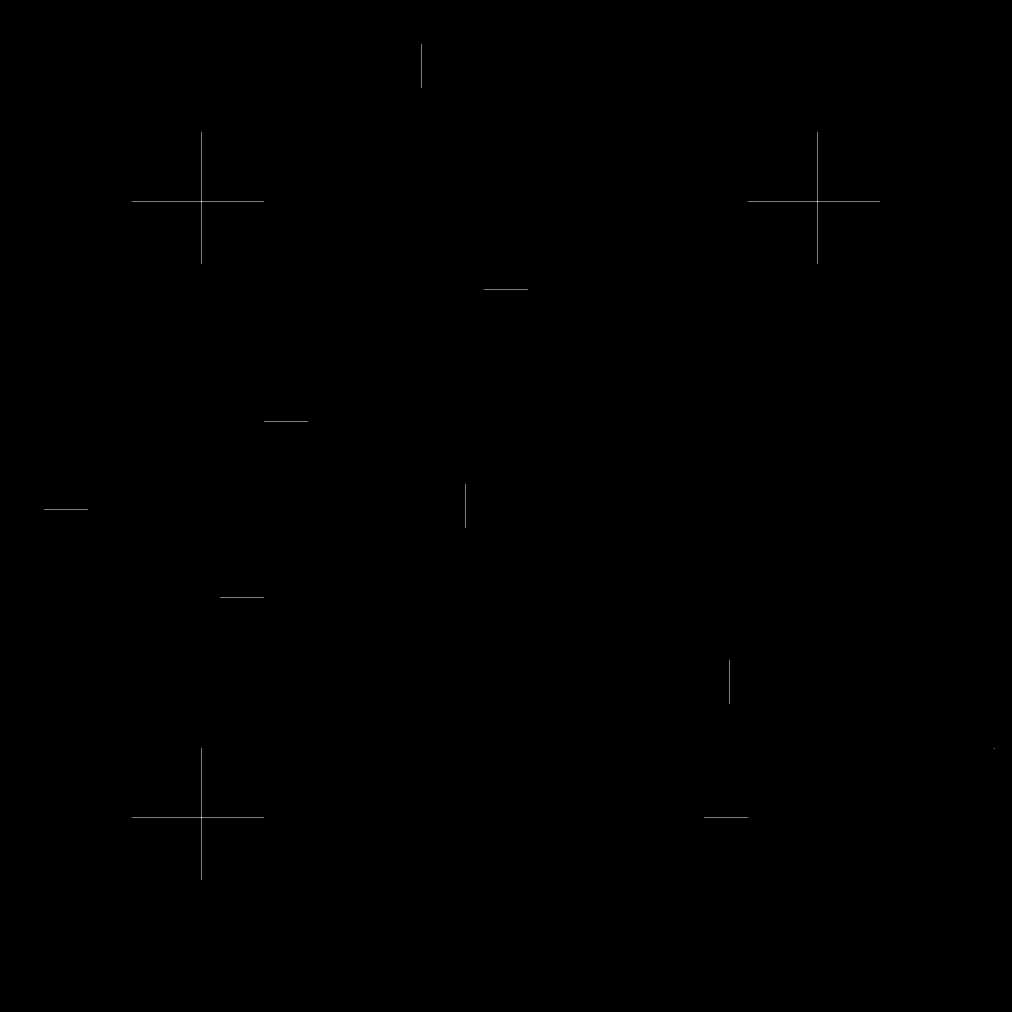

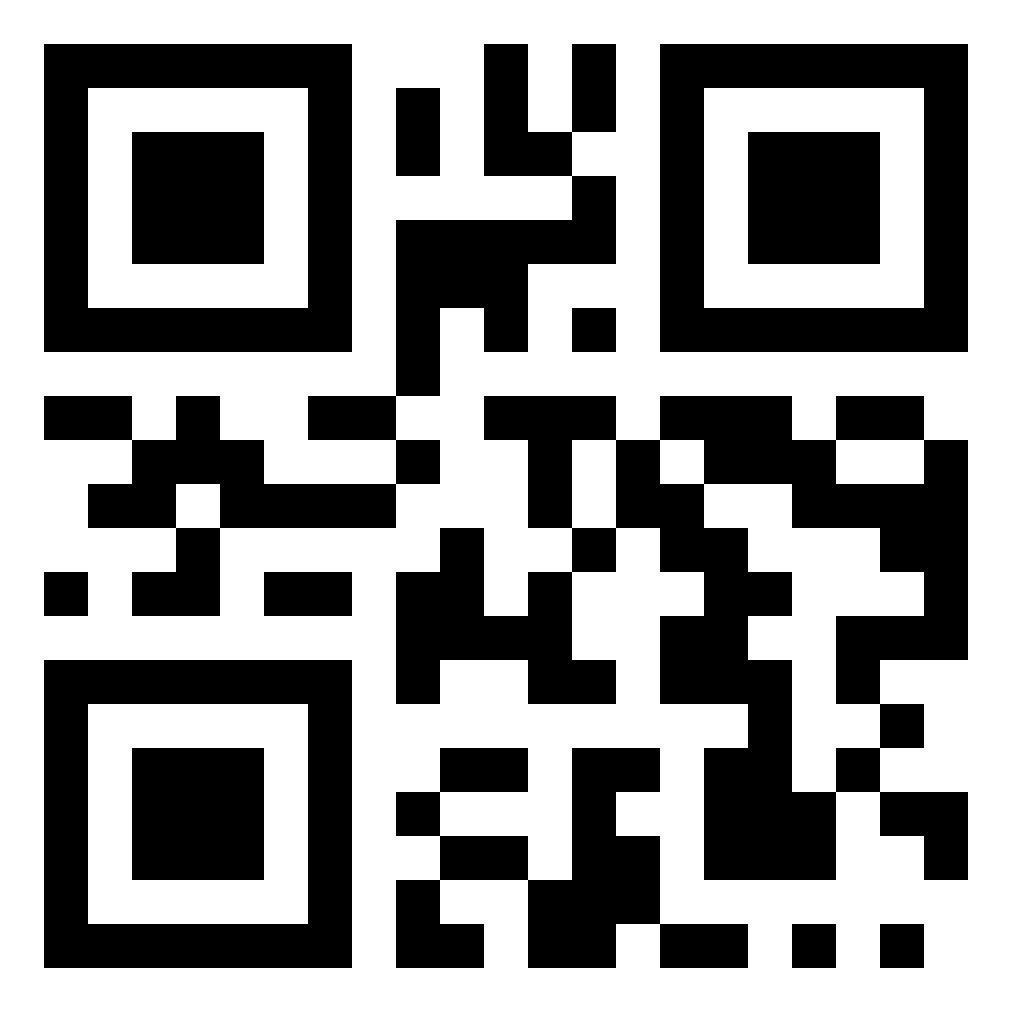

In [ ]:
def isLocator(curr_integral, last_3_integrals):

  if len(last_3_integrals)<2:
    last_3_integrals.append(curr_integral)
    return False

  elif len(last_3_integrals)<3:
    last_3_integrals.append(curr_integral)

  else:
    last_3_integrals.pop(0)
    last_3_integrals.append(curr_integral)


  f,s,t = last_3_integrals[:3]
  if (abs(s-t) < 5) and (abs(f-3*s) < 6):
    return True
  else:
    return False





# Load the image
img = cv2.imread('/content/01-Getting-started.png')
# Create a black mask image
integral = np.zeros_like(img)

gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# finding the image integral
h, w = thresh.shape[:2]
state = 255
count = 0
last_3_integrals = []
for i in range(h):

  for j in range(w):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newJ = int(j-3.5*count)
        integral[i][newJ] += 127
      count = 0

for j in range(w):

  for i in range(h):

    if thresh[i][j] == state:
      count += 1
    else:
      state = 0 if state == 255 else 255
      #integral[i][j] = count
      if isLocator(count, last_3_integrals):
        newI = int(i-3.5*count)
        integral[newI][j] += 127
      count = 0

cv2_imshow(integral)
cv2_imshow(thresh)

In [ ]:
lines = cv2.HoughLinesP(integral, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/hough.cpp:485: error: (-215:Assertion failed) image.type() == CV_8UC1 in function 'HoughLinesProbabilistic'


# Testcase 1 (Normal)

In [ ]:
img = cv2.imread('/content/01-Getting-started.png')

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

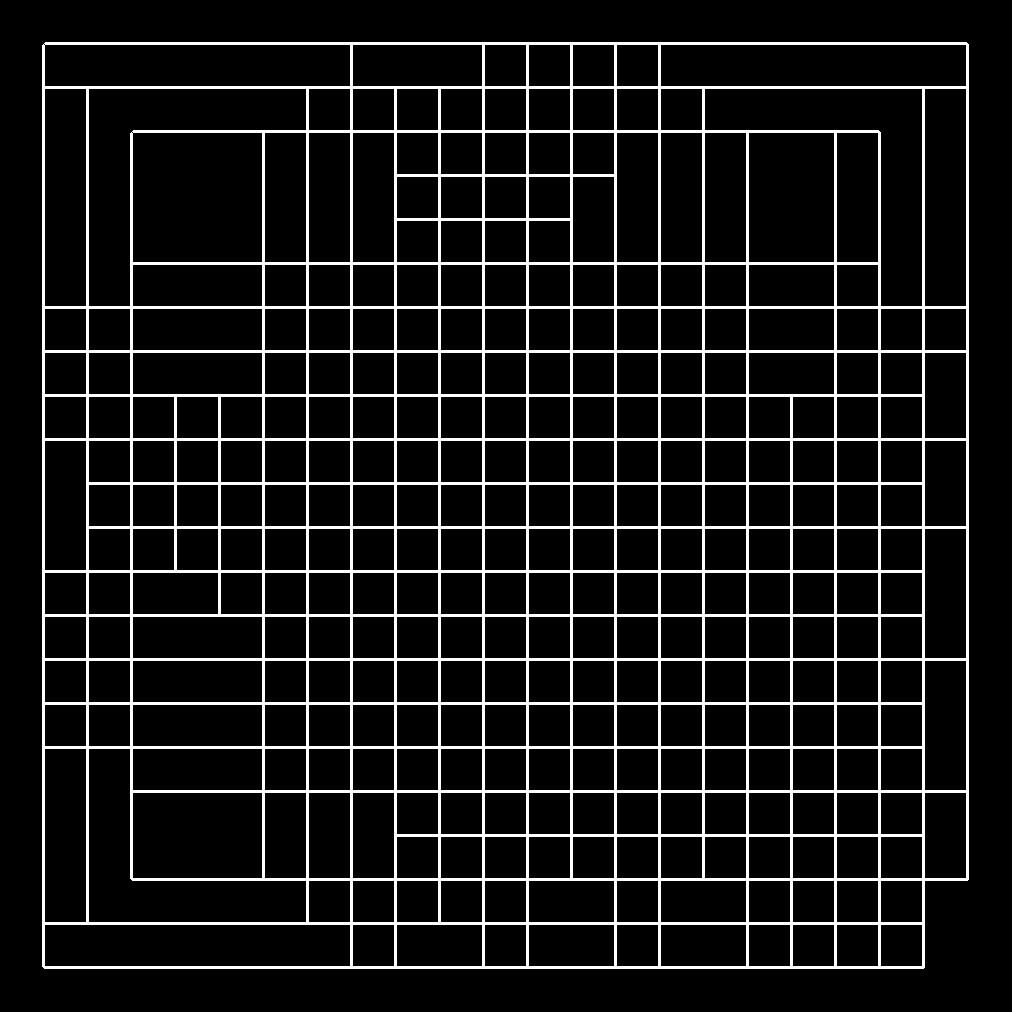

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

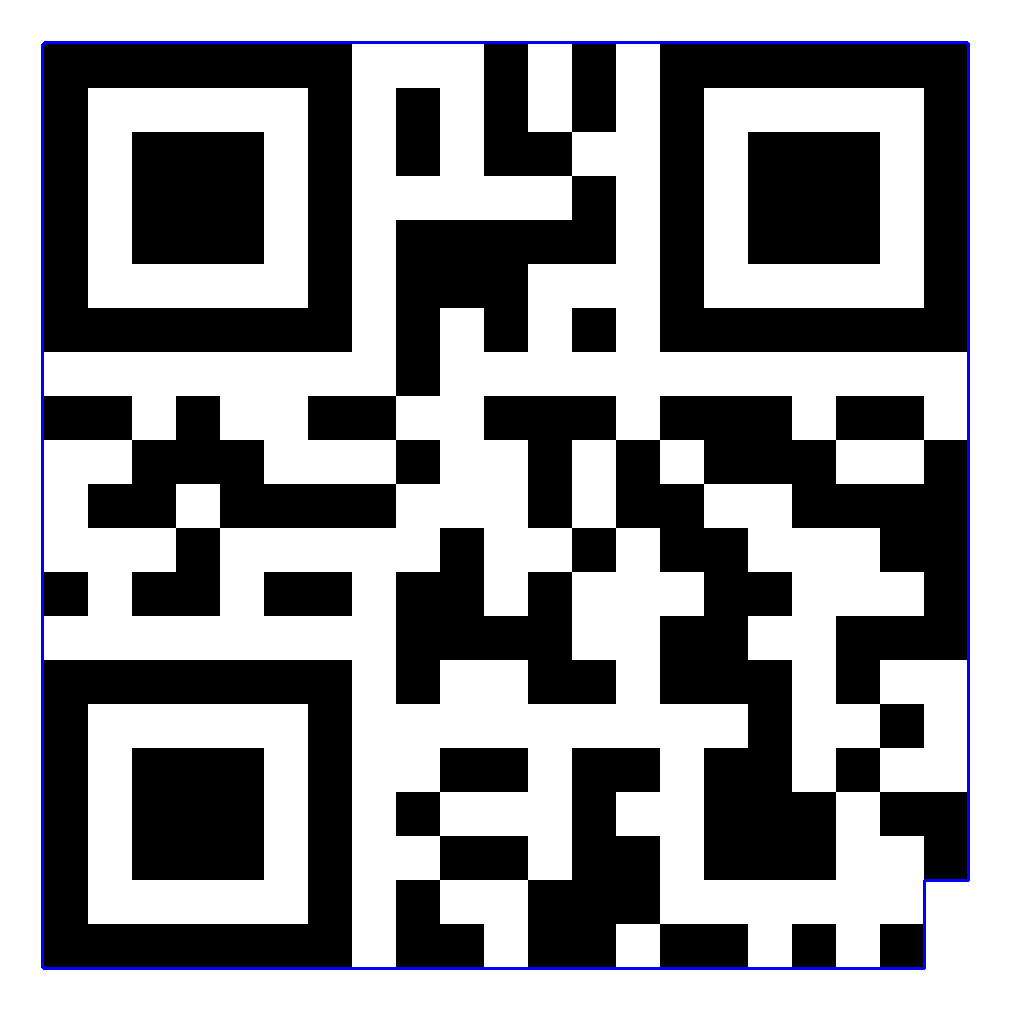

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 2 (Shifted)

In [63]:
img = cv2.imread('images/02-Matsawar-3edel-ya3am.png')

(-0.5, 1031.5, 1031.5, -0.5)

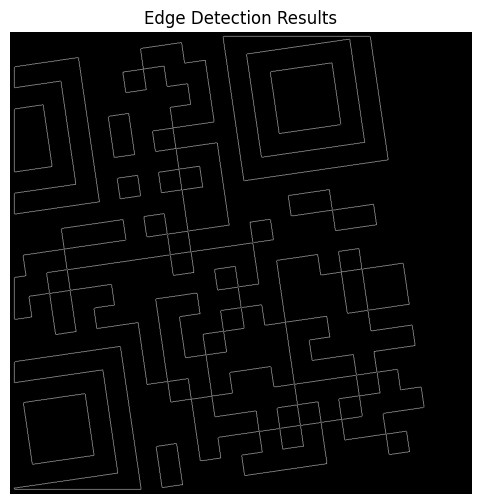

In [64]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_thresh = cv2.copyMakeBorder(thresh, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
padded_edges = cv2.Canny(padded_thresh, 50, 150)

plt.figure(figsize=(10,6))
plt.imshow(padded_edges, cmap='gray')
plt.title('Edge Detection Results')
plt.axis('off')


(-0.5, 1031.5, 1031.5, -0.5)

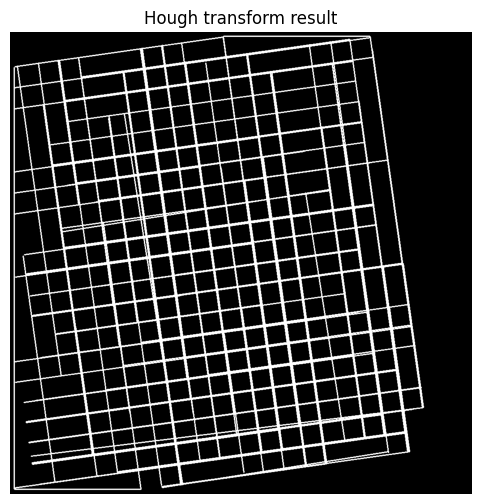

In [62]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(padded_edges, 1, np.pi / 180, threshold=35, minLineLength=250, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(padded_edges)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)

plt.figure(figsize=(10,6))
plt.imshow(mask, cmap='gray')
plt.title('Hough transform result')
plt.axis('off')
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

(-0.5, 1011.5, 1011.5, -0.5)

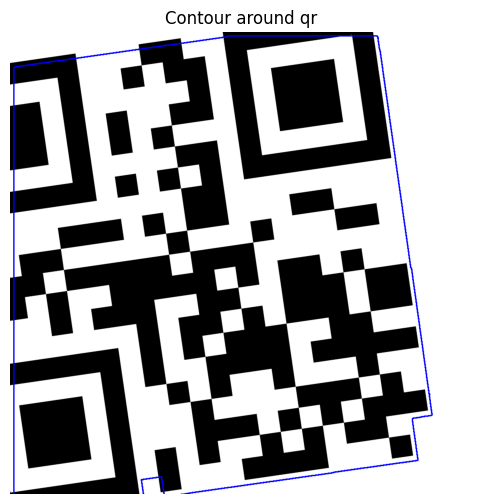

In [65]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter squares
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour
            # Draw the approximated contour in green
            # cv2.polylines(img, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (0, 0, 255), 2)


plt.figure(figsize=(10,6))
plt.imshow(img, cmap='gray')
plt.title('Contour around qr')
plt.axis('off')

# Testcase 3 (Upside-down)

In [3]:
img = cv2.imread('images/03-Leffy-bina-ya-donya.png')

True

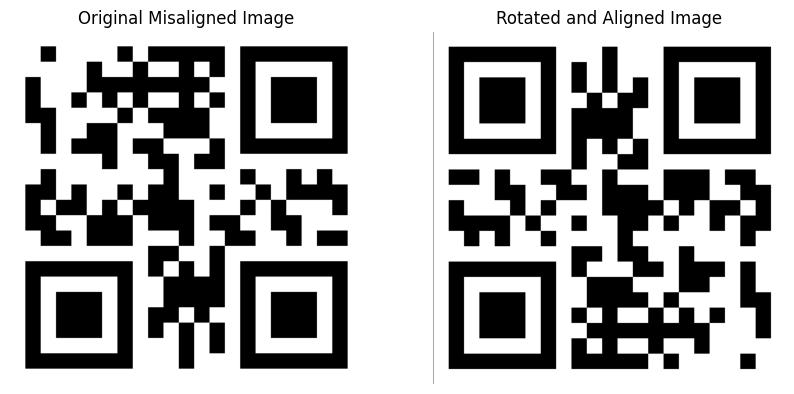

In [54]:
# Define the angle of rotation (in degrees)
angle = 180

# Get the shape of the image
(h, w) = img.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Perform the rotation
matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(img, matrix, (w, h))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Misaligned Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated and Aligned Image')
plt.axis('off')

# Save the filtered image
cv2.imwrite('images/03-solved.png', rotated_image)


In [10]:
# Load the QR code image
qr_code_image = cv2.imread('images/03-Leffy-bina-ya-donya.png')

# Detect mirroring and get the angle of rotation if mirrored
is_mirrored, rotation_angle = detect_mirroring(qr_code_image)

if is_mirrored:
    # Correct the mirroring by flipping the image horizontally
    corrected_image = correct_mirroring(qr_code_image)
    cv2.imshow('Corrected QR Code', corrected_image)
else:
    print("QR code is not mirrored.")


C:\Users\hp\AppData\Local\Temp\ipykernel_13188\1536791497.py:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


QR code is not mirrored.


In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(thresh, 50, 150)

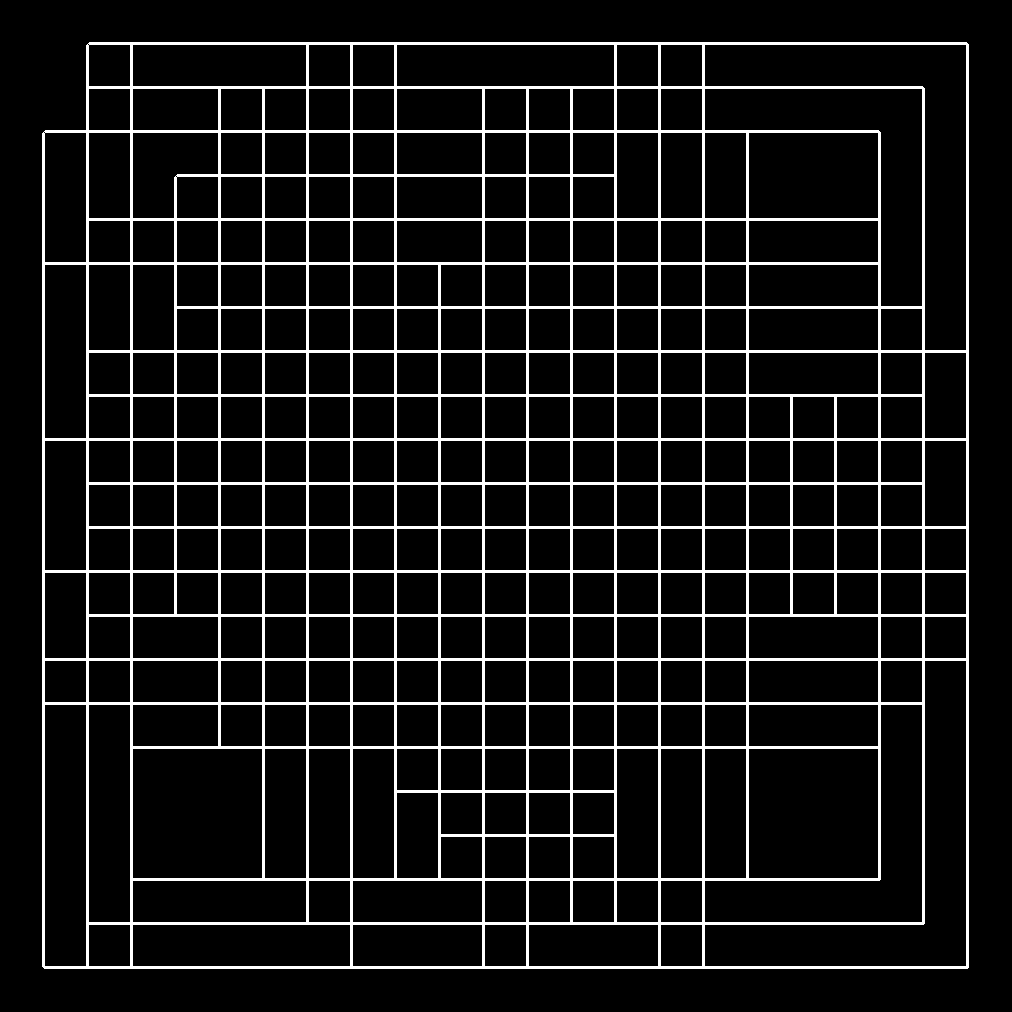

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=500)

# Create a black mask image
mask = np.zeros_like(gs_img)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

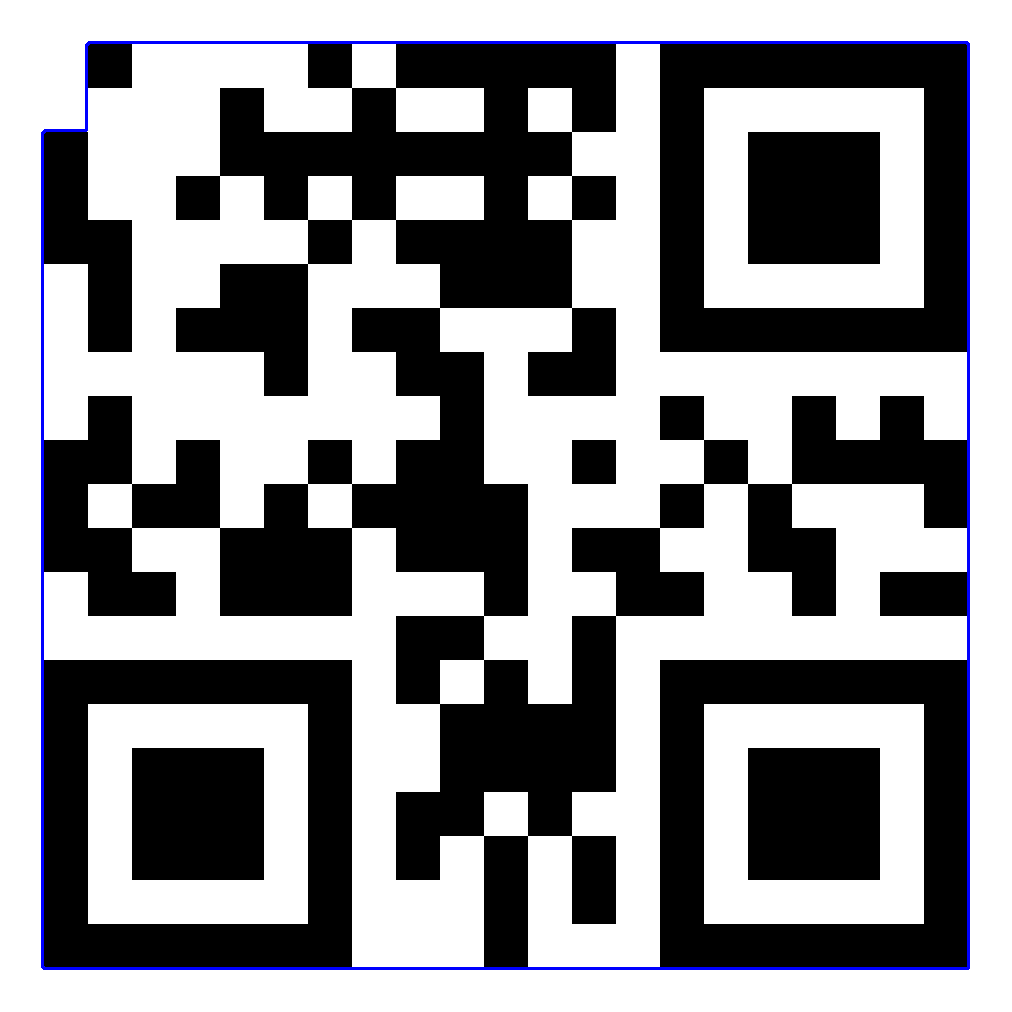

In [ ]:
# find contours in the mask

contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter hexagons
        #print(len(approx))
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)

cv2_imshow(img)

# Testcase 4 (Inverted)

In [19]:
# Function to invert the colors of an image
def invert_and_threshold(image_path, output_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Invert the colors by subtracting each pixel's value from 255 (assuming it's a grayscale image)
    inverted_img = 255 - img

    _, thresholded_img = cv2.threshold(inverted_img, 200, 255, cv2.THRESH_BINARY)

    # Save the inverted image
    cv2.imwrite(output_path, thresholded_img)

# Example usage
input_image = 'images/04-Black-mirror.png'
output_image = 'images/04-solved.png'

invert_and_threshold(input_image, output_image)

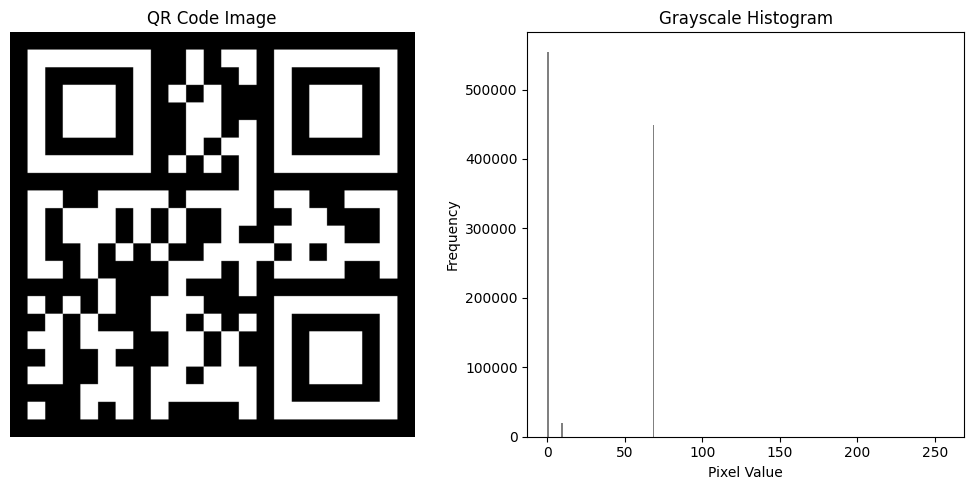

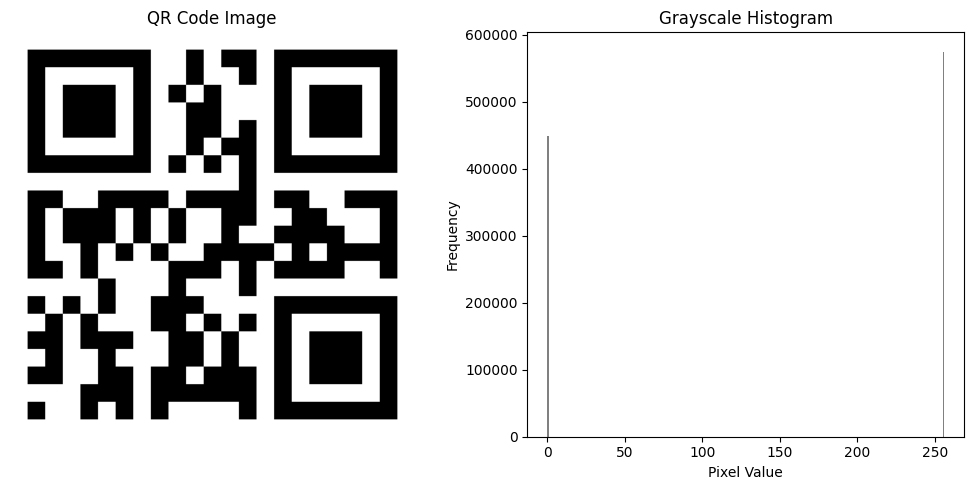

In [19]:
plot_image_and_histogram('images/04-Black-mirror.png')
invert_and_threshold('images/04-Black-mirror.png', 'images/04-Inverted-Black-mirror.png')
plot_image_and_histogram('images/04-solved.png')

# Testcase 5 (Caesear cipher)

It seems that j values are shifted based on the i value of the pixel , let's analyze the image to find the key they had been shifted with

In [ ]:
img = cv2.imread('/content/05-Caesar-cipher.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = img.shape[:2]
# print(img.shape)
for i in range(h):
  for j in range(w-1, 0, -1):
    if img[i, j] == 0:
      print(f"{i} {j}")
      break



14 990
15 990
16 990
17 990
18 990
19 990
20 990
21 990
22 990
23 990
24 990
25 990
26 990
27 990
28 990
29 990
30 990
31 990
32 990
33 989
34 989
35 989
36 989
37 986
38 986
39 986
40 986
41 986
42 986
43 986
44 986
45 986
46 986
47 986
48 986
49 986
50 986
51 986
52 986
53 986
54 986
55 986
56 986
57 986
58 986
59 986
60 986
61 986
62 986
63 986
64 986
65 986
66 986
67 986
68 986
69 986
70 986
71 986
72 992
73 992
74 992
75 992
76 992
77 992
78 992
79 992
80 992
81 992
82 992
83 992
84 992
85 992
86 992
87 992
88 992
89 992
90 992
91 992
92 992
93 992
94 992
95 992
96 992
97 992
98 992
99 996
100 996
101 996
102 996
103 996
104 996
105 996
106 996
107 999
108 999
109 999
110 999
111 999
112 999
113 999
114 999
115 999
116 999
117 999
118 999
119 999
120 999
121 999
122 999
123 999
124 999
125 999
126 999
127 999
128 999
129 999
130 999
131 999
132 1000
133 1000
134 1000
135 1000
136 1000
137 1000
138 1000
139 1000
140 1000
141 990
142 990
143 990
144 990
145 990
146 990
147 990
148 9

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


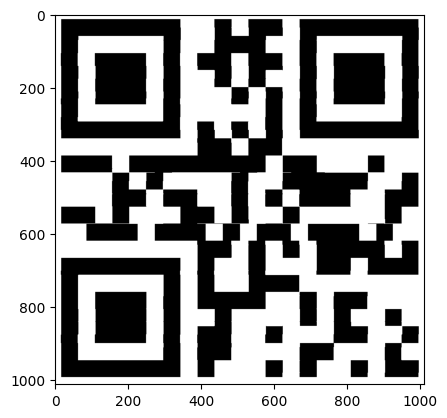

In [11]:
#define tolerance
t = 30

# load a grayscale image
img = cv2.imread('./images/05-Caesar-cipher.png', cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
mask = np.full((img.shape[0], img.shape[1]), 255)
h, w = img.shape[:2]

first_from_left = 0
first_from_right = 0
# find first black pixel from the left
b = False
for i in range(h):
  if b :
    break
  for j in range(w):
    if img[i, j] == 0:
      first_from_left = j
      b = True
      break
  

# find first black pixel from the right 
b = False
for i in range(h):
  if b :
    break
  for j in range(w-1, 0, -1):
    if img[i, j] == 0:
      first_from_right = j
      b = True
      break
  

# calculate the left and right refrences
qr_width = first_from_right-first_from_left
left_ref = int((w-qr_width)/2)
right_ref = left_ref+qr_width

#print(f"sss: {first_from_left} {first_from_right}")

# apply correction to each row
for i in range(h):

  found_black_pixel = False

  # find left and right boundaries
  l_ptr = 0
  r_ptr = w-1

  while (img[i, l_ptr] == 255 or img[i, r_ptr] == 255) and (l_ptr < r_ptr):
    if img[i, l_ptr] == 255:
      l_ptr += 1
    else:
      found_black_pixel = True

    if img[i, r_ptr] == 255:
      r_ptr -= 1
    else:
      found_black_pixel = True

  #print(l_ptr)


  # correct if cross left refrence

  if (l_ptr<left_ref ) and found_black_pixel:
    shift_amount = left_ref - l_ptr
    # Shift row to the right -->
    mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

  elif (right_ref-r_ptr < t) and found_black_pixel:
    shift_amount = right_ref-r_ptr
    # Shift row to the right -->
    mask[i][l_ptr+shift_amount:r_ptr+shift_amount] = img[i][l_ptr:r_ptr]

  elif (r_ptr>right_ref ) and found_black_pixel:
    shift_amount = r_ptr - right_ref
    # Shift row to the left <--
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]

  elif (l_ptr-left_ref < t ) and found_black_pixel:
    shift_amount = l_ptr-left_ref
    # Shift row to the left <--
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]
  
  else:
    # Center the row
    center_of_the_row = int((r_ptr + l_ptr)/2)
    center_refrence = int((right_ref + left_ref)/2) 
    shift_amount = center_of_the_row - center_refrence
    mask[i][l_ptr-shift_amount:r_ptr-shift_amount] = img[i][l_ptr:r_ptr]


#plt.imshow(img, cmap='gray')
print(mask)
plt.imshow(mask, cmap='gray')


# Testcase 6 (Rohmbus, Railfence cipher)

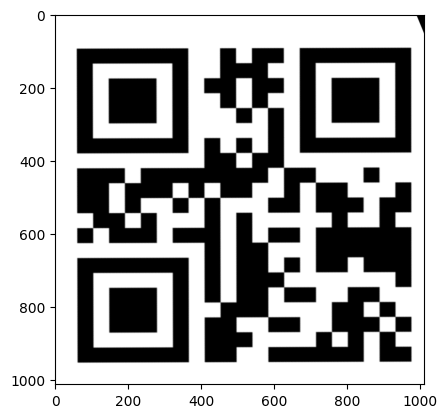

In [45]:
img = cv2.imread('./images/06-Railfence-cipher.png', cv2.IMREAD_GRAYSCALE)

# Initialize a mask to draw contour on
contour_mask = np.zeros_like(img)
# Initialize a mask to draw Hough lines on
hough_mask = np.zeros_like(img)

# Apply edge detection
edges = cv2.Canny(img, 50, 150)

# Apply Hough
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=35, minLineLength=50, maxLineGap=100)
# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_mask, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Find contours
contours, _ = cv2.findContours(hough_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to find polygons (4 sides) with maximum area
max_area = 0
selected_contour = None
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.1 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Check if the polygon has 4 vertices
    if len(approx) == 4:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        if area > max_area:
            max_area = area
            selected_contour = approx
cv2.drawContours(contour_mask, [selected_contour], -1, (255, 255, 255), 2)

# Get the edge vertices of the contour
bottom_left, top_left, top_right, bottom_right = selected_contour.reshape(-1, 2)
original_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

# Calculate new edge vertices positions
top_left = [top_right[0], bottom_left[1]]
bottom_right = [bottom_left[0], top_right[1]]
target_verticies = np.array([bottom_left, top_left, top_right, bottom_right], dtype= np.float32)

# Apply prespective 
perspective_transform_matrix = cv2.getPerspectiveTransform(original_verticies, target_verticies)
warped_image = cv2.warpPerspective(img, perspective_transform_matrix, (img.shape[1], img.shape[0]))
plt.imshow(warped_image, cmap='gray')

# Testcase 7 (Finger)

# Testcase 8 (Bahtana)

# Testcase 9 (Ink smudge)

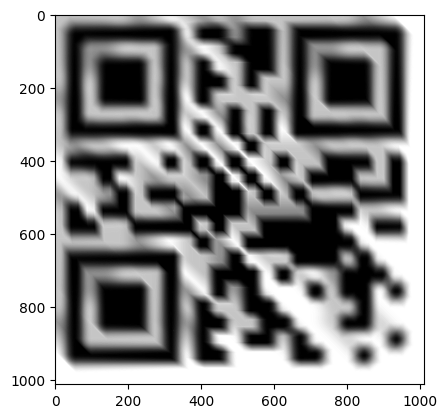

In [12]:
img = cv2.imread('./images/09-My-phone-fell-while-taking-this-one-...-or-did-it.png', cv2.IMREAD_GRAYSCALE)

# trying adaptive thresholding
# res_1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
# _, res_2 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
# plt.imshow(res_1, cmap='gray')

# trying sharpening
kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])
res = cv2.filter2D(img, -1, kernel)
plt.imshow(res, cmap='gray')

# Testcase 10 (Grey photo)

In [181]:
def contrast_stretching(image):

    # Compute the minimum and maximum pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Apply contrast stretching formula to each pixel
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255.0

    # Apply binary thresholding to make pixels either 0 or 255
    _, thresholded_img = cv2.threshold(stretched_image, 254, 255, cv2.THRESH_BINARY)

    return thresholded_img

def apply_closing(image, kernel_size):
    # Define the kernel for dilation and erosion
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Apply dilation
    dilated_image = cv2.dilate(image, kernel, iterations=1)

    # Apply erosion
    closed_image = cv2.erode(dilated_image, kernel, iterations=1)

    return closed_image

def fill_gaps(img, output_path):
    #! filling in the TOP LEFT FINDER PATTERN
    # filling the MIDDLE SQUARE
    pts = np.array([[127,127], [127, 264], [264, 264], [264, 127]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], (0, 0, 0))

    # filling the LEFT OUTER LEG
    pts = np.array([[42,352], [42, 45], [88, 45], [88, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], (0, 0, 0))

    # filling the UPPER OUTER LEG
    pts = np.array([[42,88], [42, 45], [350, 45], [350, 88]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], (0, 0, 0))

    # filling the RIGHT OUTER LEG
    pts = np.array([[304,352], [304, 45], [350, 45], [350, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], (0, 0, 0))

    # filling the BOTTOM OUTER LEG
    pts = np.array([[42,352], [42, 305], [350, 305], [350, 352]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], (0, 0, 0))

    #! filling in the TOP RIGHT FINDER PATTERN
    # filling the UPPER OUTER LEG
    pts = np.array([[657,88], [657, 45], [967, 45], [967, 88]], dtype=np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(img, [pts], (0, 0, 0))

    # Save the filtered image
    cv2.imwrite(output_path, img)

    return img

# QR code side is 925 pixels
# finalResCopy = finalRes.copy()
# finalFinalResCopy = finalRes.copy()
# # drawing lines around the qr
# # bottom line
# finalResLines = cv2.line(finalResCopy, (42,968), (967, 968), (0, 255, 0), 1)
# # right line
# finalResLines = cv2.line(finalResLines, (967,968) , (967, 45),(0, 0, 255), 1)
# # top line
# finalResLines = cv2.line(finalResLines,(967, 45), (42, 45),  (0, 0, 255),  1)
# # left line
# finalResLines = cv2.line(finalResLines, (42, 45), (42, 968), (0,0,255), 1)

# # drawing lines from the bottom left qr
# # smaller sqaure pattern side is 136 pixels
# # first vertical line
# finalResLines = cv2.line(finalResLines,(88,45), (88, 968), (0, 0, 255), 1)
# # second vertical line
# finalResLines = cv2.line(finalResLines, (127, 45), (127, 968), (0, 0, 255), 1)
# # third vertical line
# finalResLines = cv2.line(finalResLines, (264, 45), (264, 968), (0, 0, 255), 1)
# # fourth vertical line
# finalResLines = cv2.line(finalResLines, (304, 45), (304, 968), (0, 0, 255), 1)
# # fifth vertical line
# finalResLines = cv2.line(finalResLines, (350, 45), (350, 968), (0, 0, 255), 1)
# # sixth vertical line
# finalResLines = cv2.line(finalResLines, (657, 45), (657, 968), (0, 0, 255), 1)

# # drawing lines from the top right qr
# # smaller square pattern side is 136 pixels
# # first horizontal line
# finalResLines = cv2.line(finalResLines,(967, 88), (42, 88),  (0, 0, 255),  1)
# # second horizontal line
# finalResLines = cv2.line(finalResLines,(967, 127), (42, 127),  (0, 0, 255),  1)
# # third horizontal line
# finalResLines = cv2.line(finalResLines,(967, 264), (42, 264),  (0, 0, 255),  1)
# # fourth horizontal line
# finalResLines = cv2.line(finalResLines,(967, 305), (42, 305),  (0, 0, 255),  1)
# # fifth horizontal line
# finalResLines = cv2.line(finalResLines,(967, 352), (42, 352),  (0, 0, 255),  1)



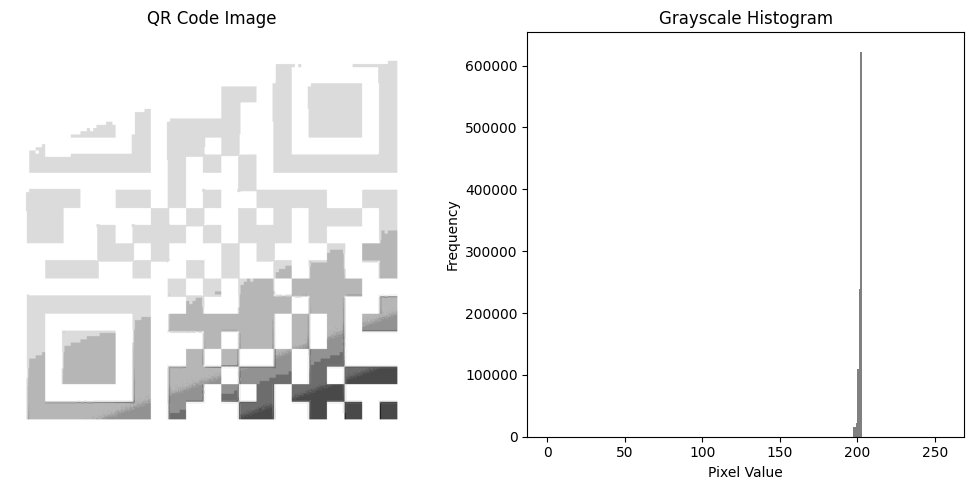

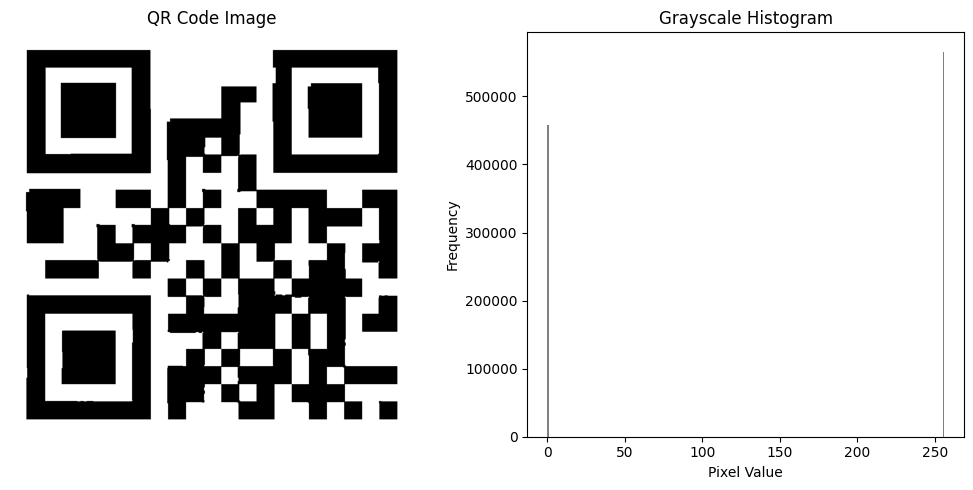

In [182]:
gone_with_the_wind_image_path = 'images/10-Gone-With-The-Wind.png'

# Read the image
img = cv2.imread(gone_with_the_wind_image_path, cv2.IMREAD_GRAYSCALE)

# applying contrast stretching
stretched_img = contrast_stretching(img)
closed_stretched_img = apply_closing(stretched_img, kernel_size=3)
finalResult = fill_gaps(closed_stretched_img, 'images/10-solved.png')


plot_image_and_histogram(gone_with_the_wind_image_path)
plot_image_and_histogram('images/10-solved.png')

# Testcase 11 (Vertical bar)

# Testcase 12 (Salt and pepper)

In [17]:
def remove_salt_and_pepper_noise(image_path, output_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding to make pixels either 0 or 255
    _, thresholded_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Apply custom median filtering
    filtered_image = cv2.medianBlur(thresholded_img, ksize=31)  # Apply median filter with ksize=1 (kernel size not used)

    # filtered_image = cv2.GaussianBlur(filtered_image, (5,5), 0)

    # Thresholding tani
    # _, thresholded_img = cv2.threshold(filtered_image, 127, 255, cv2.THRESH_BINARY)

    # # Save the filtered image
    # cv2.imwrite('filtered_image_custom_1x4.png', filtered_image)


    

    # # Define the filter size as 1x4
    # filter_size = (1, 4)

    # # Apply median filtering to remove salt and pepper noise
    # filtered_img = cv2.medianBlur(thresholded_img, ksize= filter_size)

    # Save the filtered image
    cv2.imwrite(output_path, filtered_image)

    return filtered_image

# Function to decode QR code
def decode_qr_code(image_path):
    # Read the QR code image
    img = cv2.imread(image_path)
    
    try:
        # Decode the QR code using pyzbar
        decoded_objs = decode(img)

        if len(decoded_objs) > 0:
            print('True')
        else:
            print('False')
    except:
        print('Exception')
    
    # # Loop through the decoded objects
    # for obj in decoded_objs:
    #     # Print the data contained in the QR code
    #     print("Data:", obj.data.decode())
    #     # Print the type of QR code (e.g., QRCODE, CODE128, etc.)
    #     print("Type:", obj.type)


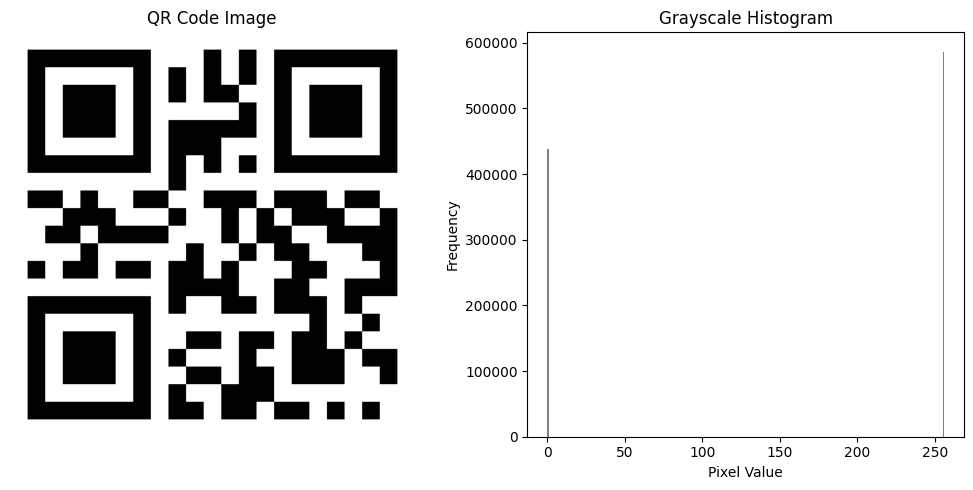

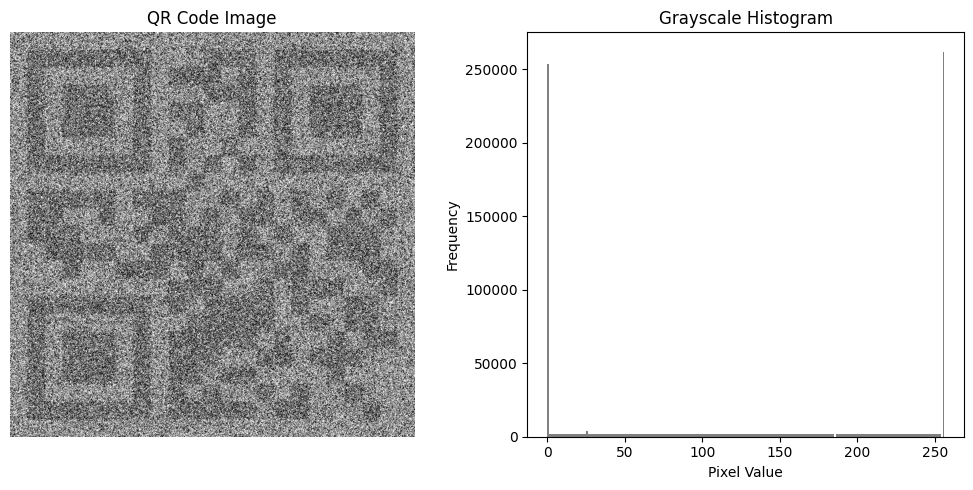

In [17]:
# plotting a clean qr code and the salt&pepper noise one to compare the differences in histogram
plot_image_and_histogram('images/01-Getting-started.png')
plot_image_and_histogram('images/12-mal7-w-felfel.png')

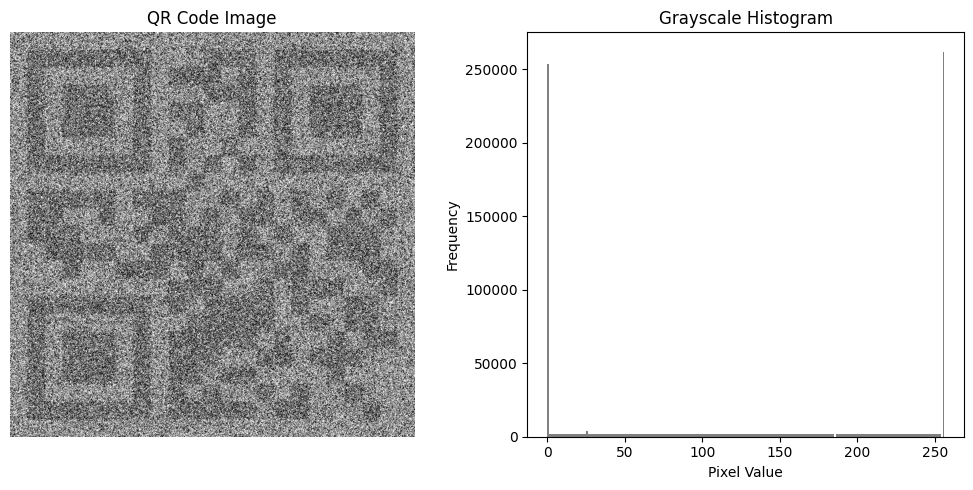

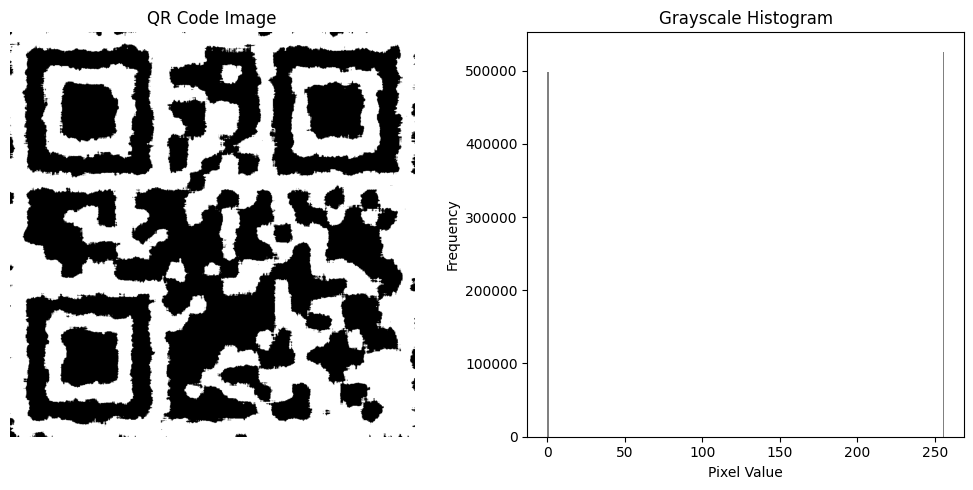

Exception


In [19]:
plot_image_and_histogram('images/12-mal7-w-felfel.png')
# Try different filter sizes
# filter_sizes = [3, 5, 7, 9, 11]
# for size in filter_sizes:
#     filtered_image = remove_salt_and_pepper_noise('images/12-mal7-w-felfel.png', f'filtered_image_{size}.png')
#     plot_image_and_histogram(f'filtered_image_{size}.png')
gray_scaled_img = cv2.imread('images/12-mal7-w-felfel.png', cv2.IMREAD_GRAYSCALE)

# Read the image
# img = cv2.imread('images/12-mal7-w-felfel.png')



remove_salt_and_pepper_noise('images/12-mal7-w-felfel.png', 'images/12-solved.png')
plot_image_and_histogram('images/12-solved.png')
decode_qr_code('images/01-Getting_started.png')

# Testcase 13 (Black photo)

# Testcase 14 (Banana)

In [ ]:
img = cv2.imread('/content/14-BANANAAA!!!.png')

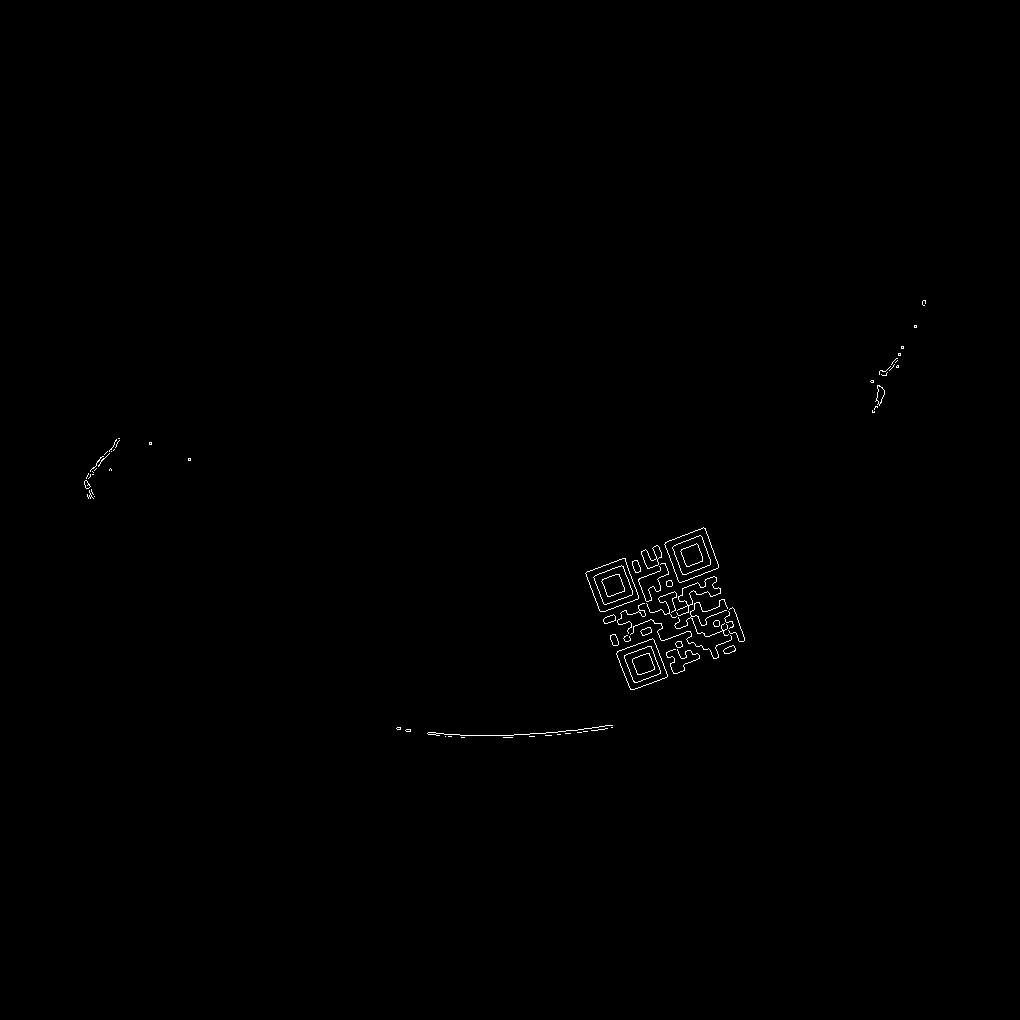

In [ ]:
# convert into gray-scale -> threshold -> canny edge detection
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gs_img, 90, 255, cv2.THRESH_BINARY)

# Add padding so we can draw complete lines in the hough transform
padding = 10
padded_thresh = cv2.copyMakeBorder(thresh, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=255)
padded_edges = cv2.Canny(padded_thresh, 50, 150)
cv2_imshow(padded_edges)

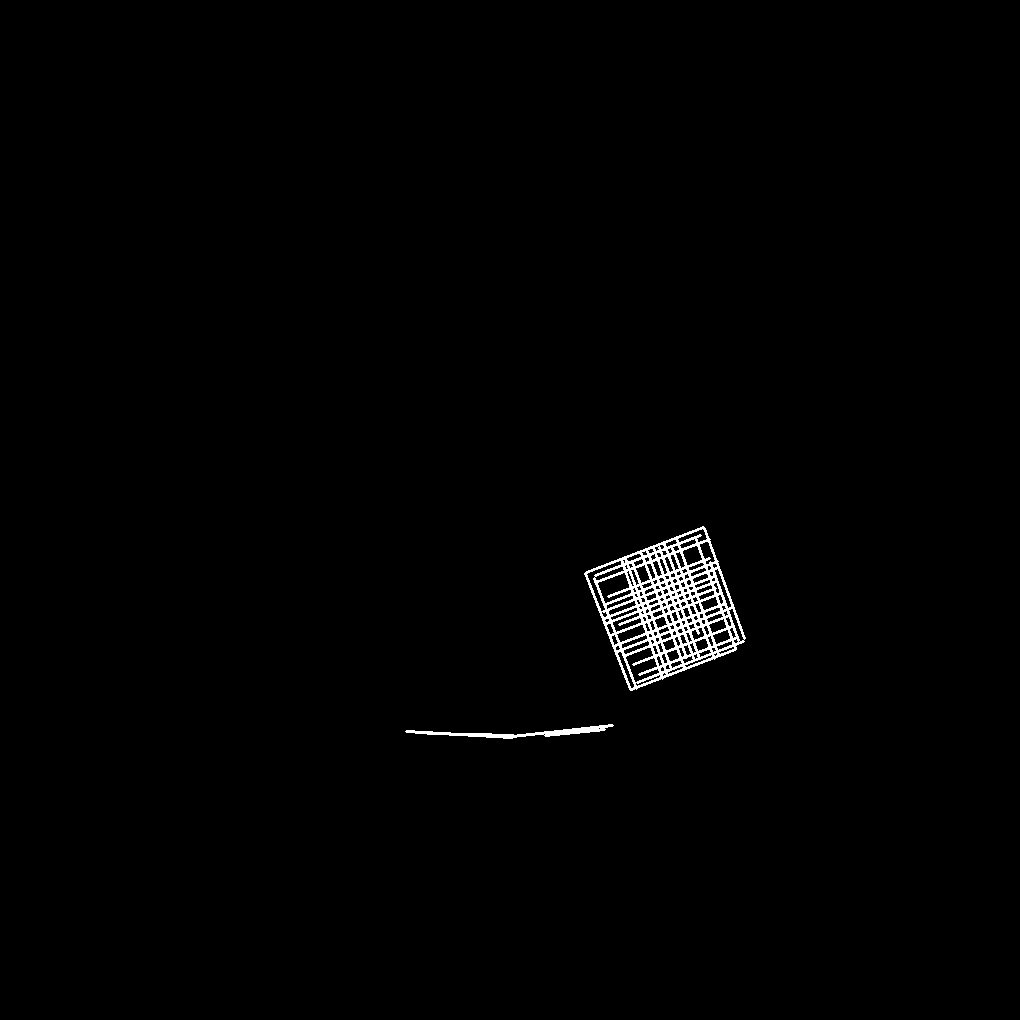

In [ ]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(padded_edges, 1, np.pi / 180, threshold=30, minLineLength=50, maxLineGap=50)

# Create a black mask image
mask = np.zeros_like(padded_edges)

# Draw detected lines on the mask
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 2)
cv2_imshow(mask)
# Find contours in the mask image
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Fill the area enclosed by the lines with black color
# filled_image = np.zeros_like(img)

# cv2.fillPoly(mask, mask[0], (255, 255, 255))

# cv2_imshow(filled_image)

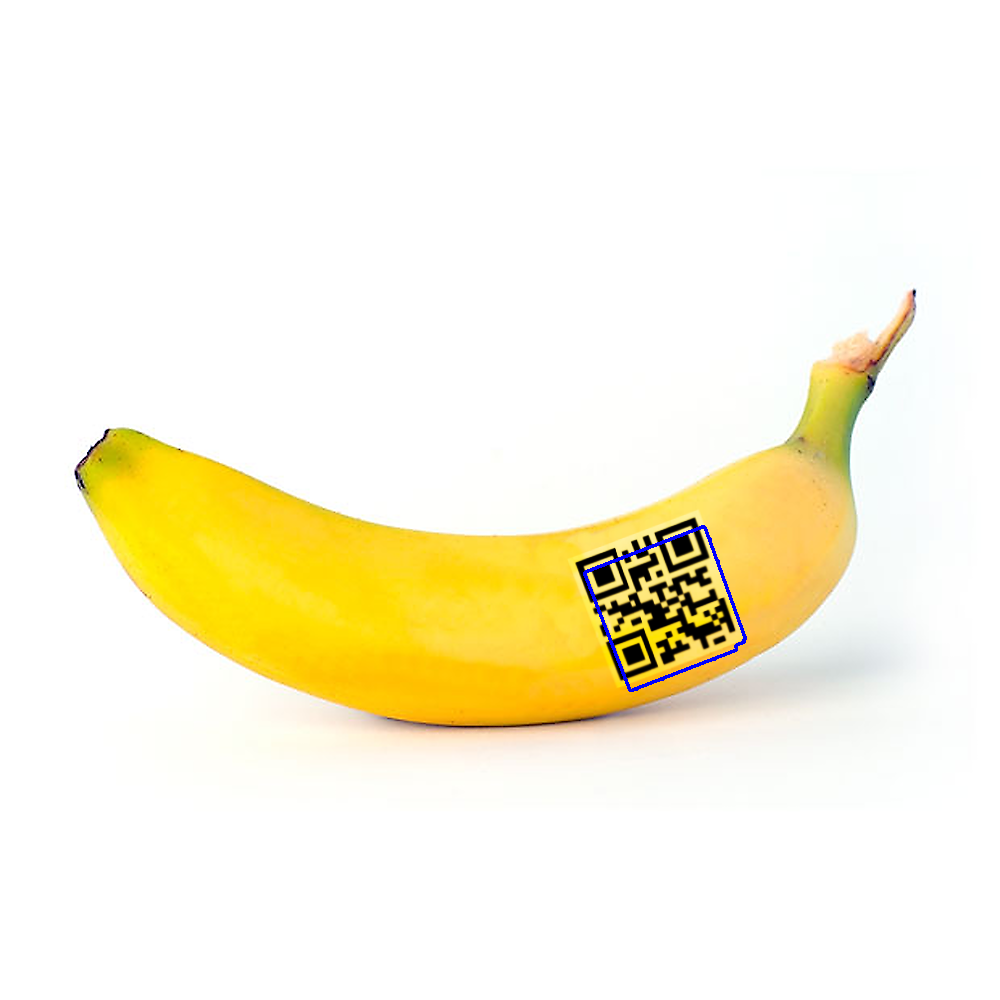

In [ ]:
# find contours in the mask
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Filter contours that have 4 edge points
max_perimeter = 0
selected_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Filter squares
        perimeter = cv2.arcLength(contour, True)
        if perimeter > max_perimeter:
            max_perimeter = perimeter
            selected_contour = contour
            # Draw the approximated contour in green
            #cv2.polylines(img, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

# Draw the selected contour on the original image
if selected_contour is not None:
    cv2.drawContours(img, [selected_contour], -1, (255, 0, 0), 2)


cv2_imshow(img)

# Testcase 15 (Wara2a ma2to3a)

### What this case needs:
* Thresholding to leave only the qr
* Decoding to see if we can read the qr after thresholding

(-0.5, 329.5, 329.5, -0.5)

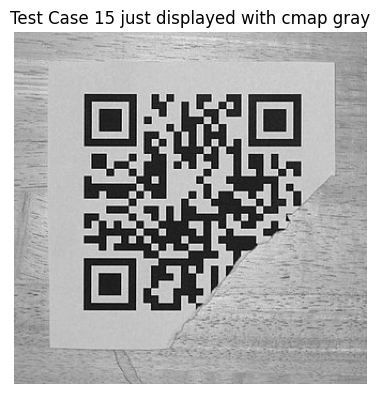

In [41]:
img_15 = cv2.imread('images/15-beast-mode-computer-vision-(this-one-is-from-wikipedia).jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_15, cmap='gray')
plt.title('Test Case 15 just displayed with cmap gray')
plt.axis('off')

In [48]:
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 100))
se_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (100, 100))
se_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
square_se = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

True

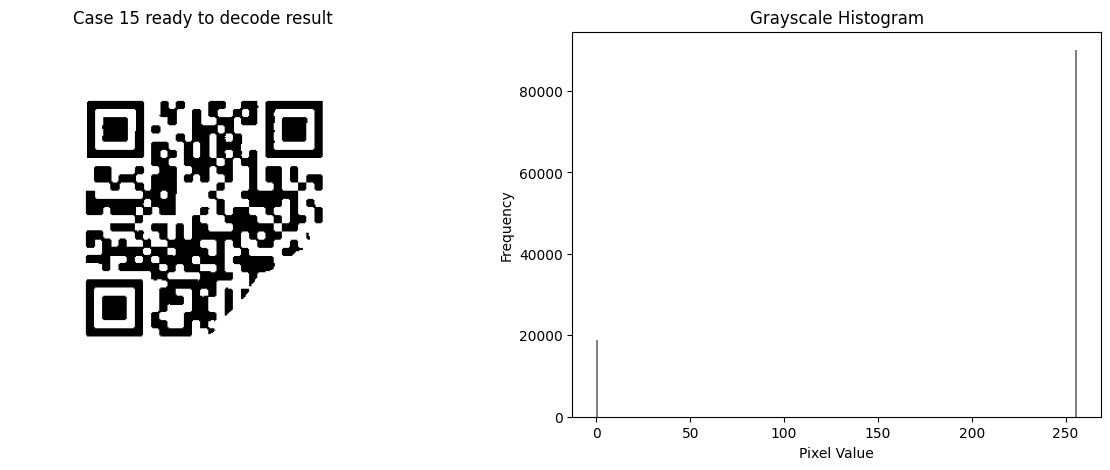

In [53]:
_, thresholded_img = cv2.threshold(img_15, 120, 255, cv2.THRESH_BINARY)

filtered_img = cv2.medianBlur(thresholded_img, 3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(filtered_img, cmap='gray')
plt.title('Case 15 ready to decode result')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(filtered_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Grayscale Histogram')

# Save the filtered image
cv2.imwrite('images/15-solved.png', filtered_img)


# Testcase 16 (Big QR)

# Noise detection

In [ ]:
def detect_noise_type(image_gray, threshold=0.05):
    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image_gray)

    # Check for Gaussian noise based on standard deviation
    if std_dev < threshold * 255:
        return "Gaussian Noise"

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([image_gray], [0], None, [256], [0, 256])

    # Check for salt and pepper noise based on histogram spikes
    peak_ratio = np.sum(histogram[:10]) + np.sum(histogram[-10:])
    total_pixels = image_gray.shape[0] * image_gray.shape[1]
    if peak_ratio / total_pixels > 0.01:
        return "Salt and Pepper Noise"

    # Check for speckle noise based on local variance
    variance = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    if variance < threshold:
        return "Speckle Noise"

    return "No Recognizable Noise"


# Example usage:
image_path = 'images/01-Getting-started.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

noise_type = detect_noise_type(image)
print("Detected Noise Type:", noise_type)
